# **Pixels and Image Filtering**

### **1.1 Import the required packages and load the input image(5%)**

Download the required data from the google drive and load it.

Display the input image.

Note: If you are unable to download the file from the google drive link , please download it directly from this URL

URL: https://drive.google.com/file/d/1cxbUexTPahDqof7Vy2l-4IKXFwybxs-s



*   ref: `https://www.structural.net/Services/force-protection`



Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
Downloading...
From: https://drive.google.com/uc?id=1cxbUexTPahDqof7Vy2l-4IKXFwybxs-s
To: /content/rebar_cage.jpg
100% 69.8k/69.8k [00:00<00:00, 18.2MB/s]


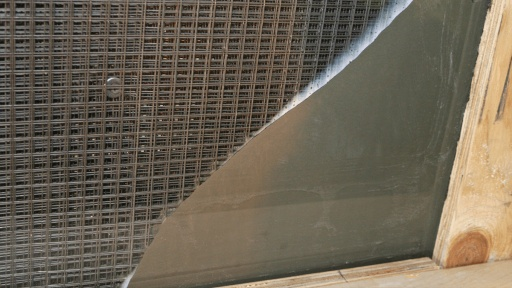

In [6]:
import cv2
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/gdrive/')

# input image 
!gdown --id '1cxbUexTPahDqof7Vy2l-4IKXFwybxs-s' --output rebar_cage.jpg
# TODO: use opencv to read and show the image
path ="./rebar_cage.jpg"
originalImage = cv2.imread(path)
cv2_imshow(originalImage)

### **1.2 Convert to Grayscale(5%)**

Use OpenCV to convert the original image into a grayscale image and display it.

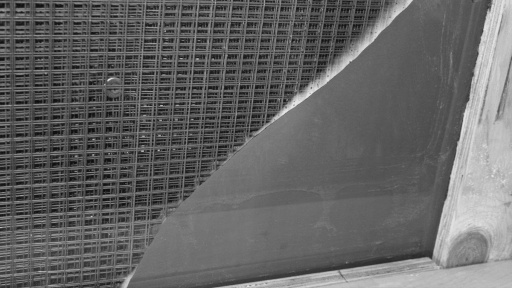

In [7]:
# TODO: use opencv to convert to the graysclae image
grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY ) 
cv2_imshow(grayImage)

# **Edge detection**

### **2.1 Padding(10%)**



When we are doing image processing, the boundary often encounters problems that cannot be smoothly calculated.

One of solution is using padding to avoid the boundary problem.


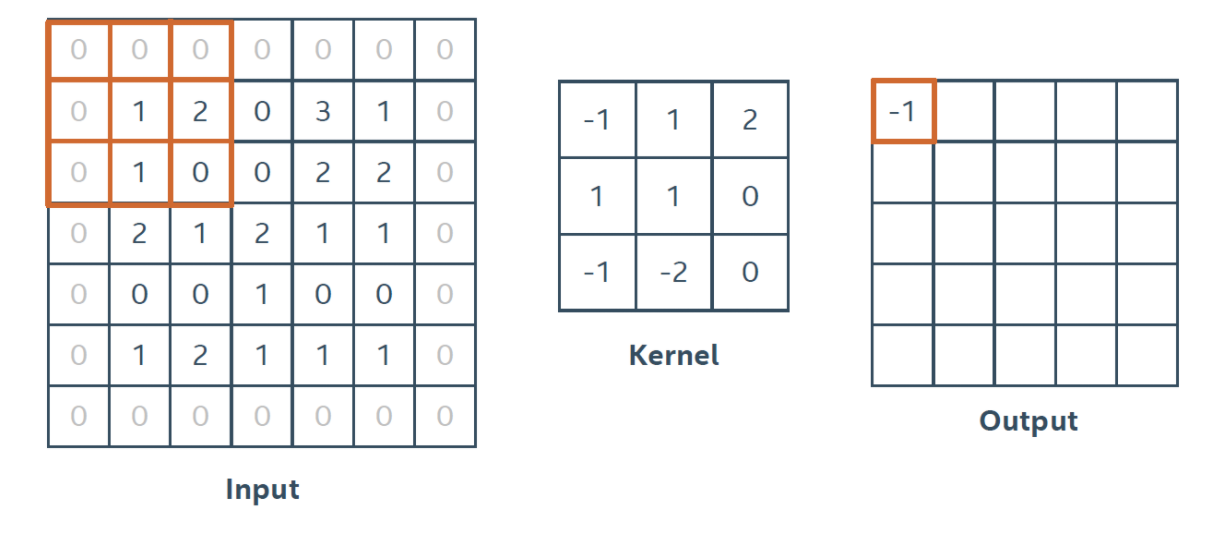


Use numpy for padding a 3*4 sequential matix.


You should print out two arrays after this block.

1. 3X4 sequential matix

2. 3X4 sequential matix with 1 layer padding with zeros

In [8]:
import numpy as np
# TODO: make a numpy array by using np.arange 
arr1=np.arange(0,12)
arr1=np.reshape(arr1, (-1, 4))
print(arr1)
# TODO: use np.pad to apply padding with zeros arround the array. 
# hint: np.pad([input],[padding_width],'constant')
arr2=np.pad(arr1, ((1,1),(1,1)), 'constant' ,constant_values=0)
print(arr2)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  0  0  0  0  0]
 [ 0  0  1  2  3  0]
 [ 0  4  5  6  7  0]
 [ 0  8  9 10 11  0]
 [ 0  0  0  0  0  0]]


##**2.2 Sobel operator**

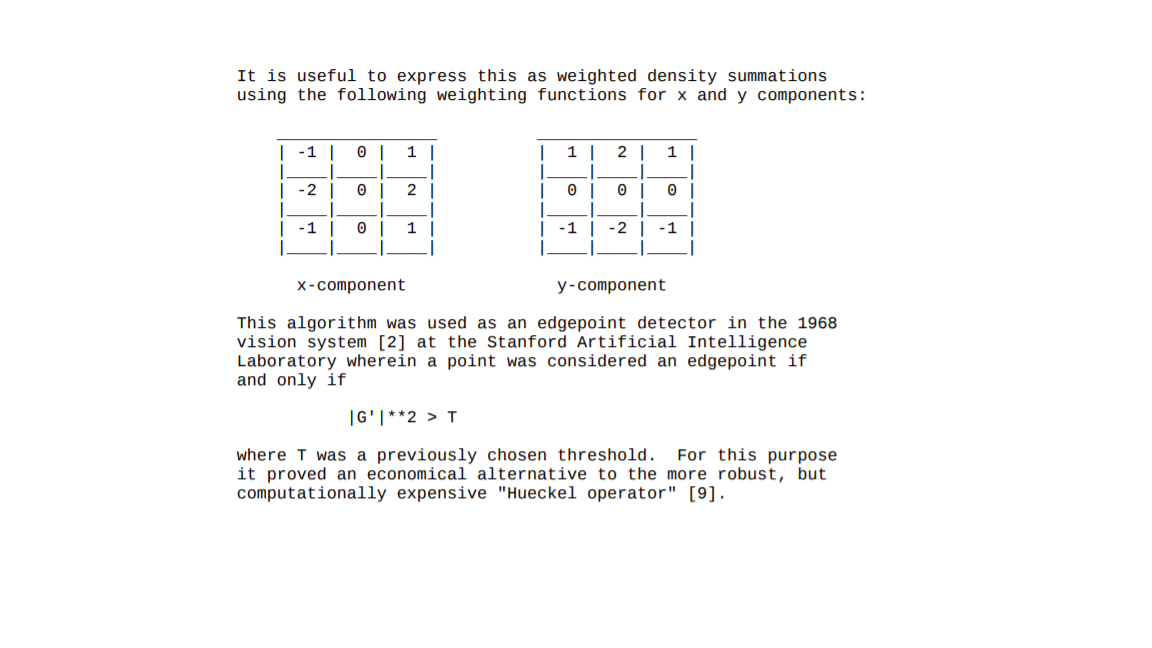
Reference: Sobel, Irwin. (2014). An Isotropic 3x3 Image Gradient Operator. Presentation at Stanford A.I. Project 1968. 


---







### **2.2.1 Sobel y_component(15%)**

Show the image after applying Sobel y_component filter.

here we choose 180 as the threshold value.

image
0~290
pad

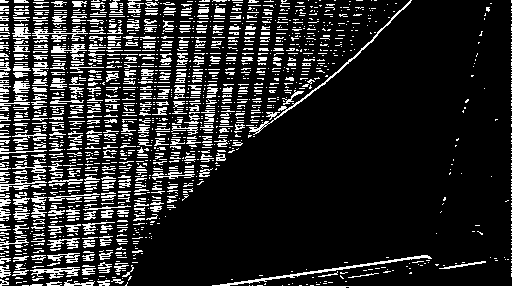

In [9]:
img=grayImage
def sobel_y_operator (input, threshold):
  # create a numpy zeros array whose shape should be same as the input image
  img_y = np.zeros(input.shape)
  # TODO: create a sobel y-component filter 
  # hint: sobel y-component filter is a 3x3 matric which is mensioned above
  sobel_y = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

  # TODO: Pad the input image with zeros. Padding width should be equal half of the filter width.
  input_padding = np.pad(input, 1, 'constant' ,constant_values=0)

  # apply the Sobel filter. Avoid processing outside the boundary
  for row in range(int(sobel_y.shape[0]/2),input_padding.shape[0]-int(sobel_y.shape[0]/2)):
    # TODO: set the range when processing the image in column
    for col in range(int(sobel_y.shape[1]/2),input_padding.shape[1]-int(sobel_y.shape[1]/2)):
      # TODO: compute the gradient in y direction of each pixel
      # hint: np.sum() can help you to sum up the elements, be care of the index 
      Gy = np.sum(np.array(input_padding[row-1:row+2,col-1:col+2])*np.array(sobel_y[0:3,0:3]))
      # TODO: compute G, which is equals to sqrt(Gy**2+Gy**2)
      G=(Gy**2+Gy**2)**0.5
      # TODO: compare G with the threshold, if G > threshold, turn the pixel white, else turn it black
      if G>threshold:
        img_y[row-2,col-2]=255
  return img_y
cv2_imshow(sobel_y_operator(img, 180))

### **2.2.2 Sobel_x_component(15%)**

Similar to Sobel y_component operator, try to do Sobel x_component operator

Hint: You need to fix only one array

Show the image after applying Sobel x_component filter

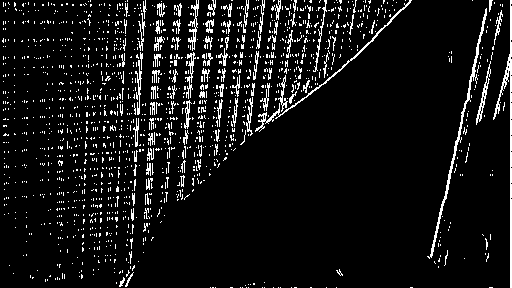

In [10]:
img=grayImage
def sobel_x_operator (input, threshold):
  # create a numpy zeros array whose shape should be same as the input image
  img_x = np.zeros(input.shape)
  # TODO: create a sobel y-component filter 
  # hint: sobel y-component filter is a 3x3 matric which is mensioned above
  sobel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])

  # TODO: Pad the input image with zeros. Padding width should be equal half of the filter width.
  input_padding = np.pad(input, 1, 'constant' ,constant_values=0)

  # apply the Sobel filter. Avoid processing outside the boundary
  for row in range(int(sobel_x.shape[0]/2),input_padding.shape[0]-int(sobel_x.shape[0]/2)):
    # TODO: set the range when processing the image in column
    for col in range(int(sobel_x.shape[1]/2),input_padding.shape[1]-int(sobel_x.shape[1]/2)):
      # TODO: compute the gradient in y direction of each pixel
      # hint: np.sum() can help you to sum up the elements, be care of the index 
      Gx = np.sum(np.array(input_padding[row-1:row+2,col-1:col+2])*np.array(sobel_x[0:3,0:3]))
      # TODO: compute G, which is equals to sqrt(Gy**2+Gy**2)
      G=(Gx**2+Gx**2)**0.5
      # TODO: compare G with the threshold, if G > threshold, turn the pixel white, else turn it black
      if G>threshold:
        img_x[row-2,col-2]=255
  return img_x
cv2_imshow(sobel_x_operator(img, 180))

### **2.2.3 Sobel(25%)**

Now you have the Sobel x and y components filter. Merge them to get the complete Sobel operator

Hint: Copy the code developed in the last section and modify it to get the result easily

Show the image after applying the Sobel operator

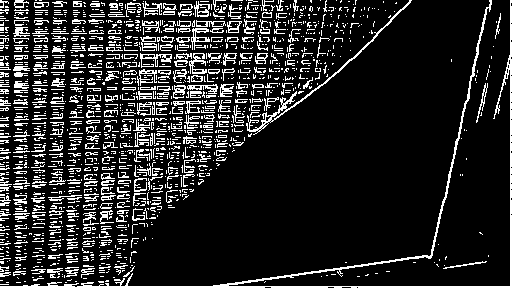

In [11]:
img=grayImage
# TODO: finish the sobel_operator function
def sobel_operator (input, threshold):
  # create a numpy zeros array whose shape should be same as the input image
  img_sobel = np.zeros(input.shape)
  sobel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
  sobel_y = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
  # apply padding same as earlier
  input_padding = np.pad(input, 1, 'constant' ,constant_values=0)
  # apply the Sobel filter. Avoid processing outside the boundary
  for row in range(int(sobel_x.shape[0]/2),input_padding.shape[0]-int(sobel_x.shape[0]/2)):
    for col in range(int(sobel_x.shape[1]/2),input_padding.shape[1]-int(sobel_x.shape[1]/2)):
      Gx = np.sum(np.array(input_padding[row-1:row+2,col-1:col+2])*np.array(sobel_x[0:3,0:3]))
      Gy = np.sum(np.array(input_padding[row-1:row+2,col-1:col+2])*np.array(sobel_y[0:3,0:3]))

      # compute G, which is equals to sqrt(Gx**2+Gy**2)
      G=(Gx**2+Gy**2)**0.5
      # compare G with the threshold, if G > threshold, turn the pixel white, else turn it black
      if G>threshold:
        img_sobel[row-2,col-2]=255
  return img_sobel
 
cv2_imshow(sobel_operator(img, 180))

## **2.3 Edge detection with OpenCV**

### **2.3.1 Sobel with OpenCV(15%)**
Here we use the library to apply the sobel filter.

*The result will have some different between what we apply above due to the approximation and the normalization of the gradient  when calculating.

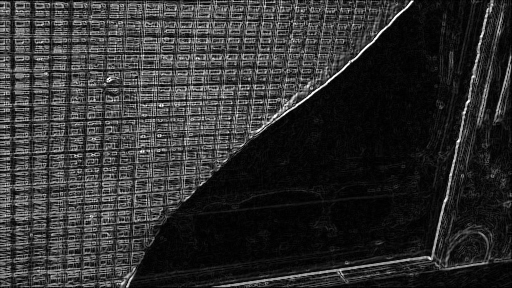

In [12]:
# TODO: use cv2.Sobel() to calculate the derivatives from the image horizentally and vertically, 
#     calculate the gradient at each point, 
#     and compare the gradient with a proper threshold(you can decide it as long as the output is clear).
# hint: cv2.Sobel() can only calculate the derivatives
x = cv2.Sobel(img, cv2.CV_16S, 1, 0)
y = cv2.Sobel(img, cv2.CV_16S, 0, 1)

absX = cv2.convertScaleAbs(x)# 轉回uint8
absY = cv2.convertScaleAbs(y)

dst = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)
cv2_imshow(dst)


###**2.3.2 Canny with OpenCV(10%)**
Another method for edge detection!

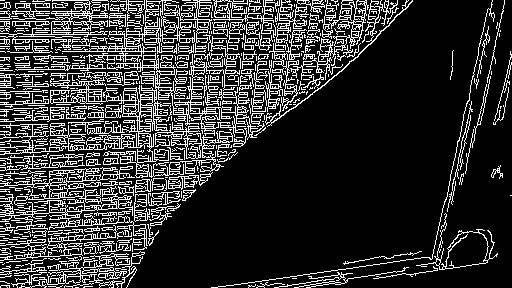

In [13]:
# TODO: use cv2.Canny() to apply edge detection.
canny = cv2.Canny(img, 60, 215)
cv2_imshow(canny)

# Bonus

This section has three parts.

The first two parts are to show how to make a Gaussian filter and visualize it. The third part is for applying the gaussian filter.

### **3.1 Gaussian filter**

2-D Gaussian function: 


$f(x,y) = \frac{1}{2\pi\sigma^2} 
e^{ -\left(\frac{(x-\mu)^2+(y-\mu)^2}{2\sigma^2}\right) }
$

here we choose σ = 1 for represetation


---

Just click run!

---


In [14]:
def make_5x5_gaussian_filter(sigma):
  #create 5X5 array as filter
  gaussian_filter = np.zeros([5, 5])
  #use gaussian distribution to write filter 
  for row in range(5):
    for col in range(5):
      gaussian_filter[row, col] = 1/(2*np.pi*sigma**2)*np.e**(-((col-2)**2+(row-2)**2)/(2*(sigma**2)))
  #normalization
  gaussian_filter=gaussian_filter/np.sum(gaussian_filter)
  #retrun filter
  return gaussian_filter
print(make_5x5_gaussian_filter(1))

[[0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.02193823 0.09832033 0.16210282 0.09832033 0.02193823]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]]


### **3.2 Matplotlib**
Matplotlib is widely used python data visualization library



---

Just click run!

---



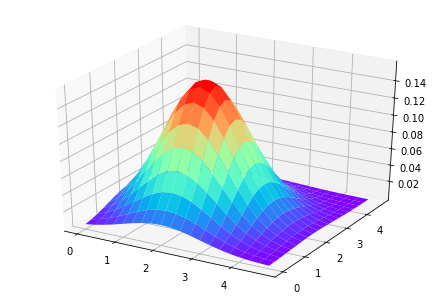

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
# X, Y value 
f = make_5x5_gaussian_filter (1)
X = np.arange(0, f.shape[1], 0.25)
Y = np.arange(0, f.shape[0], 0.25)
X, Y = np.meshgrid(X, Y)    # x-y mesh
sigma = 1
# height value
R = 1/(2*np.pi*sigma**2)*np.e**(-((X-2)**2+(Y-2)**2)/(2*(sigma**2)))

ax.plot_surface(X, Y, R, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'))

### **3.3 Image processing with Gaussian filter(25%)**

Try to apply Gaussian filter. σ=1
 
Hint: Like Sobel but something different!
 
Note: Do not just call the fountion. You will get zero point

Show the image after applying Gaussian filter.

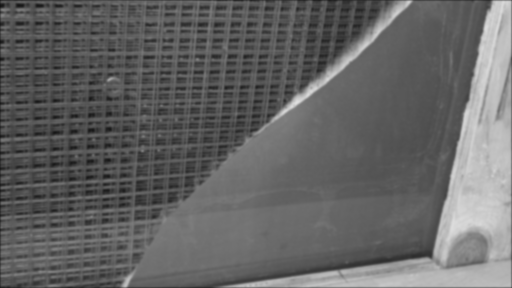

In [16]:
img=grayImage
def gaussian_operator (input):
  # create a numpy zeros array whose shape should be same as the input image
  img_x = np.zeros(input.shape)
  # TODO: create a sobel y-component filter 
  gaussian = make_5x5_gaussian_filter(1)

  # TODO: Pad the input image with zeros. Padding width should be equal half of the filter width.
  input_padding = np.pad(input, int(gaussian.shape[0]/2), 'constant' ,constant_values=0)

  # apply the Sobel filter. Avoid processing outside the boundary
  for row in range(int(gaussian.shape[0]/2),input_padding.shape[0]-int(gaussian.shape[0]/2)):
    # TODO: set the range when processing the image in column
    for col in range(int(gaussian.shape[1]/2),input_padding.shape[1]-int(gaussian.shape[1]/2)):
      # TODO: compute the gradient in y direction of each pixel
      # hint: np.sum() can help you to sum up the elements, be care of the index 
      img_x[row-2,col-2]= np.sum(np.array(input_padding[row-2:row+3,col-2:col+3])*np.array(gaussian[0:5,0:5]))
  return img_x
cv2_imshow(gaussian_operator (img))